# INDIVIDUAL PROJECT
For your Individual Project, using the same nyc-violations data,
conduct an Exploratory Data Analysis on the dataset and produce a 
report in your Jupyter Notebook describing insights gleaned from the dataset. Please note that 
this EDA report must contain appropriate visualizations, to show trends and insights gleaned.

In [1]:
import pandas as pd
import numpy as np

In [2]:
nycviolation_df=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\practice files\violations.csv')

In [3]:
pd.set_option('display.max_columns', 5)
nycviolation_df.head()

,Summons Number,Plate ID,...,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,...,NaN,NaN
1,8793684599,L5232HY,...,NaN,NaN
2,8864757053,BPMN76,...,NaN,NaN
3,8778326047,57387MJ,...,NaN,NaN
4,4706640702,M81KFJ,...,NaN,NaN


In [4]:
nycviolation_df.isna().sum()

Summons Number                           0
Plate ID                                 0
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      145
Vehicle Make                           136
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                   17893
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                       17857
Issuer Squad                         17857
Violation Time                           1
Time First Observed                  48111
Violation County                       117
Violation In Front Of Or Opposite    18068
House Numbe

In [5]:
#Getting Columns 
nycviolation_df.columns.tolist()


['Summons Number',
 'Plate ID',
 'Registration State',
 'Plate Type',
 'Issue Date',
 'Violation Code',
 'Vehicle Body Type',
 'Vehicle Make',
 'Issuing Agency',
 'Street Code1',
 'Street Code2',
 'Street Code3',
 'Vehicle Expiration Date',
 'Violation Location',
 'Violation Precinct',
 'Issuer Precinct',
 'Issuer Code',
 'Issuer Command',
 'Issuer Squad',
 'Violation Time',
 'Time First Observed',
 'Violation County',
 'Violation In Front Of Or Opposite',
 'House Number',
 'Street Name',
 'Intersecting Street',
 'Date First Observed',
 'Law Section',
 'Sub Division',
 'Violation Legal Code',
 'Days Parking In Effect    ',
 'From Hours In Effect',
 'To Hours In Effect',
 'Vehicle Color',
 'Unregistered Vehicle?',
 'Vehicle Year',
 'Meter Number',
 'Feet From Curb',
 'Violation Post Code',
 'Violation Description',
 'No Standing or Stopping Violation',
 'Hydrant Violation',
 'Double Parking Violation']

Summons Number,Plate ID,Registration State,Issue Date,Violation Code,
Violation Location,Violation Time, Violation Description, Intersecting Street

In [6]:
nysparking_df=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\practice files\violations.csv',usecols=['Summons Number','Plate ID','Registration State','Violation Code','Violation Time','Street Name','Vehicle Make','Issue Date'])

In [7]:
pd.set_option('display.max_columns', 10)
nysparking_df.head()

,Summons Number,Plate ID,Registration State,Issue Date,Violation Code,Vehicle Make,Violation Time,Street Name
0,4714702166,KGK6659,NY,11/12/2020,36,BMW,0637P,WB ATLANTIC AVE @ SH
1,8793684599,L5232HY,TN,09/14/2020,21,INTER,0853A,Rockaway Beach Blvd
2,8864757053,BPMN76,FL,11/25/2020,20,NISSA,0853A,W 113th St
3,8778326047,57387MJ,NY,08/20/2020,38,NaN,0444P,W 33rd St
4,4706640702,M81KFJ,NJ,09/09/2020,36,TOYOT,0723A,WB FOSTER AVE @ E 18


In [8]:
nysparking_df.isna().sum()

Summons Number          0
Plate ID                0
Registration State      0
Issue Date              0
Violation Code          0
Vehicle Make          136
Violation Time          1
Street Name            10
dtype: int64

In [9]:
(136/50000)*100

0.272

In [10]:
#finding how many violations occur per state
violation_per_state=nysparking_df.groupby('Registration State').size().reset_index(name='Count')
violation_per_state = violation_per_state.sort_values(by='Count', ascending=False)
top_ten_states=violation_per_state.head(10)
top_ten_states

,Registration State,Count
39,NY,36761
36,NJ,5202
44,PA,1531
12,FL,1058
8,CT,746
51,TX,579
53,VA,402
20,IN,369
24,MA,369
25,MD,325


In [12]:
violations=nysparking_df.groupby( 'Violation Code')['Summons Number'].count().reset_index().sort_values(by='Summons Number',ascending=False)
violations.head(20)

,Violation Code,Summons Number
27,36,14422
18,21,6323
29,38,4147
12,14,3451
17,20,3132
31,40,2771
5,7,1692
36,46,1638
3,5,1435
28,37,1242


In [13]:
nysparking_df['Issue Date'] = pd.to_datetime(nysparking_df['Issue Date'])  # Convert 'Issue Date' column to datetime

violations_by_date = nysparking_df.groupby('Issue Date').size().reset_index(name='count').sort_values(by='count',ascending=False)  # Group violations by date and count the occurrences

violations_by_date

,Issue Date,count
99,2020-08-20,579
127,2020-09-17,560
176,2020-11-05,552
106,2020-08-27,549
114,2020-09-04,547
...,...,...
6,2020-05-14,1
4,2020-05-06,1
3,2020-02-26,1
2,2020-02-13,1


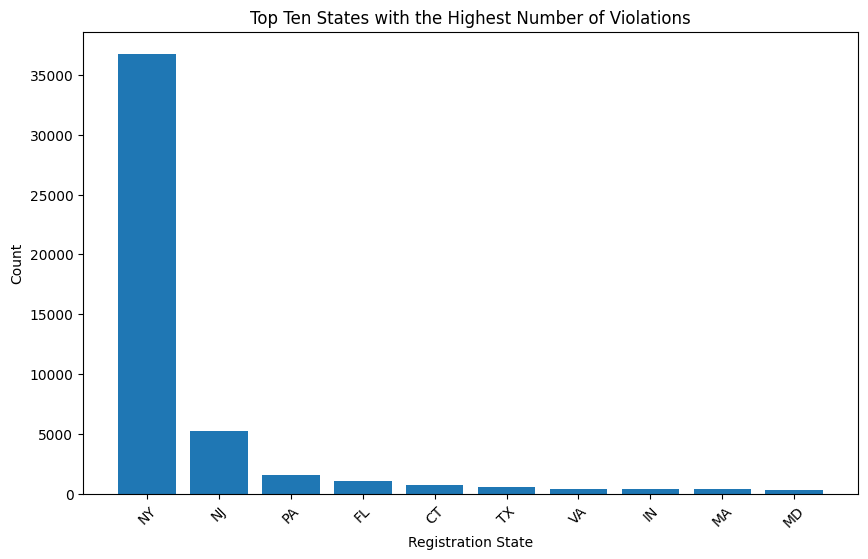

In [14]:
import matplotlib.pyplot as plt

top_ten_states = violation_per_state.head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_ten_states['Registration State'], top_ten_states['Count'])
plt.xlabel('Registration State')
plt.ylabel('Count')
plt.title('Top Ten States with the Highest Number of Violations')
plt.xticks(rotation=45)
plt.show()

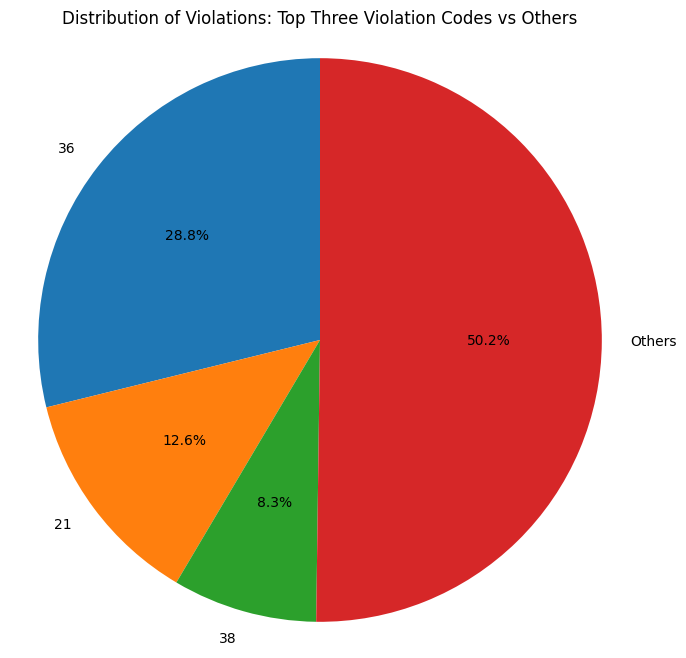

In [15]:
#violations by Code visualized
# Assuming violations is your DataFrame with violation code counts
top_three_violations = violations.head(3)

# Calculate the count for the "Others" category
other_count = violations['Summons Number'].sum() - top_three_violations['Summons Number'].sum()

labels = top_three_violations['Violation Code'].tolist() + ['Others']

# Create a list of counts for the pie chart
counts = top_three_violations['Summons Number'].tolist() + [other_count]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Violations: Top Three Violation Codes vs Others')
plt.axis('equal')

plt.show()


In [16]:
vehicle_make = nysparking_df.groupby(['Vehicle Make', 'Registration State'])['Summons Number'].count().reset_index().sort_values(by='Summons Number',ascending=False).head(10)
vehicle_make

,Vehicle Make,Registration State,Summons Number
1121,TOYOT,NY,4289
463,HONDA,NY,4260
337,FORD,NY,3750
899,NISSA,NY,3322
191,CHEVR,NY,2081
792,ME/BE,NY,1801
620,JEEP,NY,1697
107,BMW,NY,1670
269,DODGE,NY,1370
367,FRUEH,NY,1119


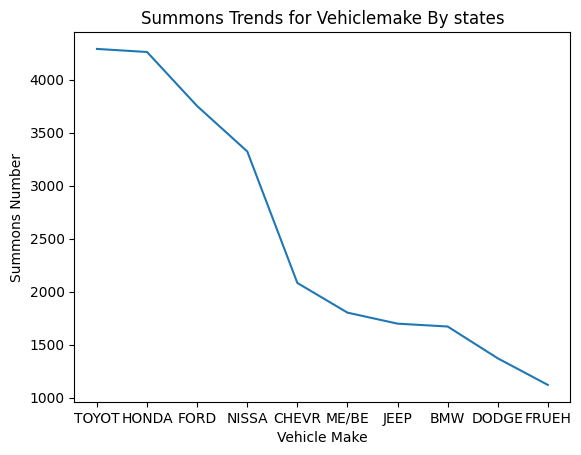

In [17]:
plt.plot(vehicle_make['Vehicle Make'],vehicle_make['Summons Number']);
plt.xlabel('Vehicle Make');
plt.ylabel('Summons Number');
plt.title('Summons Trends for Vehiclemake By states');
